In [62]:
import staticmaps
import cv2
import numpy as np

context = staticmaps.Context()


In [60]:
import matplotlib.pyplot as plt

def displayPair(img1, img2, img3 = None):
    cols = 2
    if not img3 is None:
        cols = 3
    fig = plt.figure(figsize=(16, 16))
    fig.add_subplot(1, cols, 1)
    plt.imshow(img1)
    fig.add_subplot(1, cols, 2)
    plt.imshow(img2)

    if cols == 3:
        fig.add_subplot(1, cols, 3)
        plt.imshow(img3)

    plt.show()

In [56]:
def getBinaryD(img):
    imgnp = np.array(img)
    # imgnp = cv2.cvtColor(imgnp, cv2.COLOR_BGR2GRAY)
    layers = cv2.split(imgnp)
    imgnp = layers[1]
    # imgnp = cv2.cvtColor(imgnp, cv2.COLOR_BGR2GRAY)
    _,imgnp = cv2.threshold(imgnp, 238, 255, cv2.THRESH_BINARY)
    return imgnp
    # plt.imshow(imgnp, cmap='gray')

In [ ]:
def getHouses(img):
    cv2.findContours(img, )

In [ ]:
center1 = staticmaps.create_latlng(55.578100, 42.052772)
context.set_center(center1)
context.set_zoom(17)

size = (1000, 1000)
context.set_tile_provider(staticmaps.tile_provider_CartoNoLabels)
img1 = context.render_pillow(size[0], size[1])

context.set_tile_provider(staticmaps.tile_provider_ArcGISWorldImagery)
img2 = context.render_pillow(size[0], size[1])
# displayPair(img1, img2)

In [6]:
cxtCarto = staticmaps.Context()
cxtCarto.set_tile_provider(staticmaps.tile_provider_CartoNoLabels)

cxtImagry = staticmaps.Context()
cxtImagry.set_tile_provider(staticmaps.tile_provider_ArcGISWorldImagery)

In [ ]:
params = """
42.052772|55.578100|17
42.067278|55.545482|18|map not avlp
42.060696|55.567854|16
42.058971|55.566725|17
37.607058|55.754000|17
37.614007|55.763431|17
37.638738|55.768810|16
37.676294|55.782178|17
37.721045|55.808962|17
37.497917|55.794857|15
37.490888|55.797676|17
37.411217|55.767742|16|bad
37.849002|55.682764|17
30.355458|59.918320|16
30.355277|59.944949|17""".split('\n')

size = (500, 500)


for line in params:
    prm = line.split('|')
    if len(prm) != 3:
        continue

    center = staticmaps.create_latlng(float(prm[1]), float(prm[0]))

    cxtCarto.set_center(center)
    cxtCarto.set_zoom(int(prm[2]))

    cxtImagry.set_center(center)
    cxtImagry.set_zoom(int(prm[2]))

    img1 = cxtCarto.render_pillow(size[0], size[1])
    img2 = cxtImagry.render_pillow(size[0], size[1])

    displayPair(img2, img1, getBinaryD(img1))


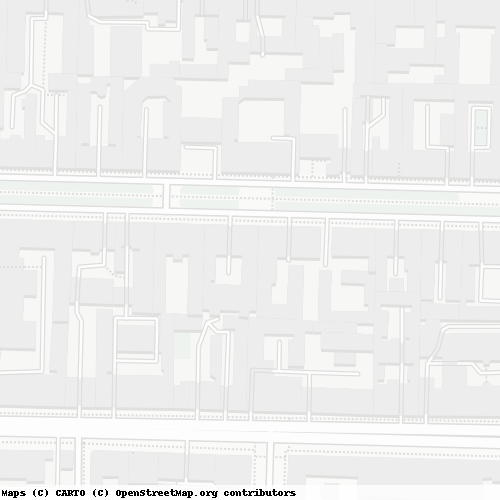

In [223]:

# center = staticmaps.create_latlng(55.578100, 42.052772)
center = staticmaps.create_latlng(59.944949, 30.355277)

cxtCarto.set_center(center)
cxtCarto.set_zoom(17)

size = (500, 500)
img1 = cxtCarto.render_pillow(size[0], size[1])
img1

In [214]:
sourceColor = np.array(img1)
# imgnp = cv2.cvtColor(imgnp, cv2.COLOR_BGR2GRAY)
layers = cv2.split(sourceColor)

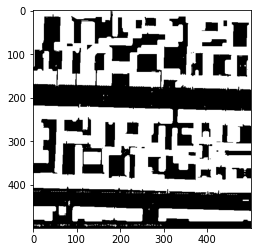

In [215]:
imgnp = layers[1]

kernel = np.ones((5,5),np.uint8)
# imgnp = cv2.cvtColor(imgnp, cv2.COLOR_BGR2GRAY)
_,imgnp = cv2.threshold(imgnp, 238, 255, cv2.THRESH_BINARY_INV)
# _,imgnp = cv2.threshold(imgnp, 127, 255, cv2.THRESH_OTSU +  cv2.THRESH_BINARY_INV)

imgnp_med = cv2.medianBlur(imgnp, 5)
imgnp = cv2.bitwise_and(imgnp_med, imgnp)
# imgnp = cv2.morphologyEx(imgnp, cv2.MORPH_ERODE, kernel)
plt.imshow(imgnp, cmap='gray')

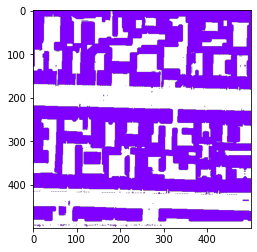

In [216]:
contours, hierarchy = cv2.findContours(imgnp, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
# drawing = np.array((imgnp.shape[0], imgnp.shape[1], 3), np.uint8)
drawing = np.zeros_like(sourceColor)
cv2.drawContours(drawing, contours, -1, (128, 0, 255, 255), cv2.FILLED)
plt.imshow(drawing)

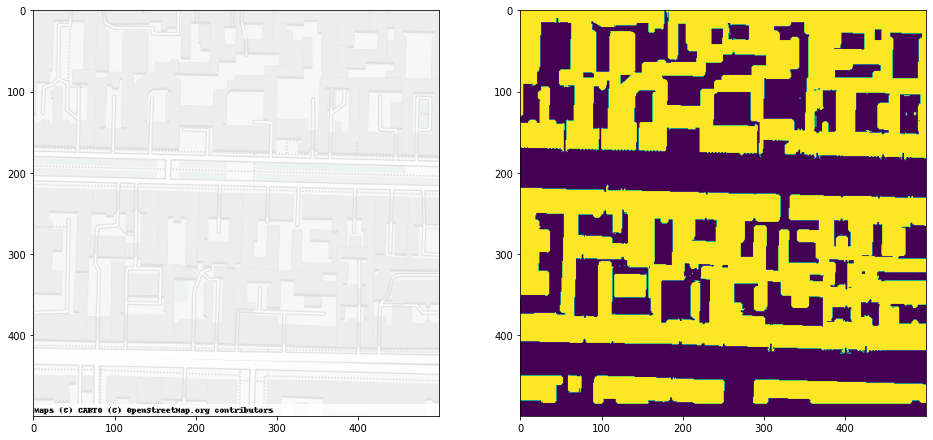

In [226]:
drawing = np.zeros_like(sourceColor)
for cnt in contours:
    M = cv2.moments(cnt)

    if M['m00'] == 0:
        continue
    # cx = int(M['m10']/M['m00'])
    # cy = int(M['m01']/M['m00'])
    # if imgnp[cy, cx] == 0:
    #     continue

    if cv2.contourArea(cnt) < cv2.arcLength(cnt,True):
        continue

    cv2.drawContours(drawing, [cnt], 0, (128, 0, 255, 255), cv2.FILLED)

drawing = cv2.cvtColor(drawing, cv2.COLOR_RGBA2GRAY)

drawing = cv2.bitwise_and(imgnp, drawing)

displayPair(img1, drawing)

In [229]:
def processBin(img):
    sourceColor = np.array(img)
    layers = cv2.split(sourceColor)
    imgnp = layers[1]

    _,imgnp = cv2.threshold(imgnp, 238, 255, cv2.THRESH_BINARY_INV)

    imgnp_med = cv2.medianBlur(imgnp, 5)
    imgnp = cv2.bitwise_and(imgnp_med, imgnp)

    contours, _ = cv2.findContours(imgnp, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    # drawing = np.zeros_like(sourceColor)
    drawing = np.zeros_like(imgnp)
    for cnt in contours:
        M = cv2.moments(cnt)
        if M['m00'] == 0:
            continue

        if cv2.contourArea(cnt) < cv2.arcLength(cnt,True):
            continue

        # cv2.drawContours(drawing, [cnt], 0, (128, 0, 255, 255), cv2.FILLED)
        cv2.drawContours(drawing, [cnt], 0, (255), cv2.FILLED)

    drawing = cv2.bitwise_and(imgnp, drawing)

    return drawing
    # displayPair(img1, drawing)

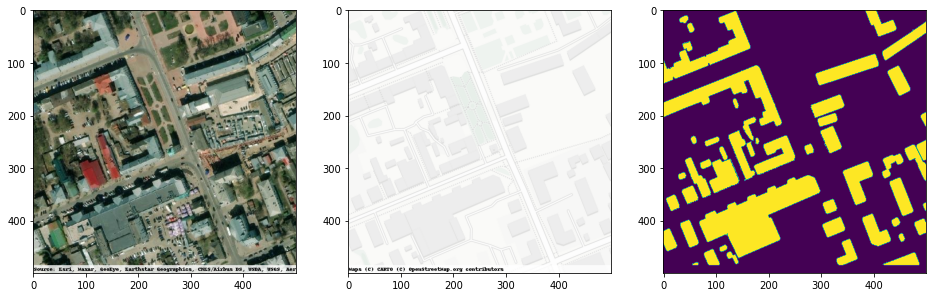

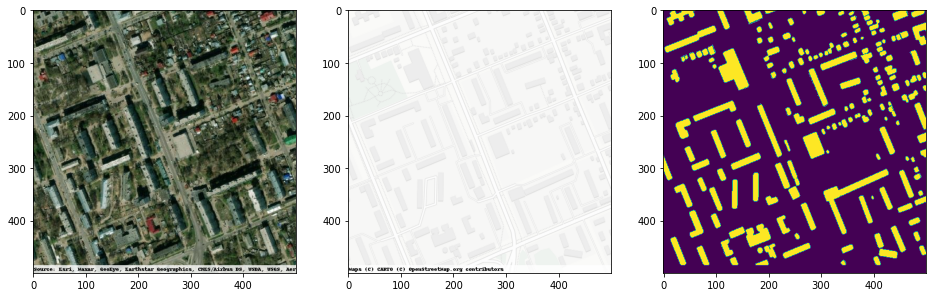

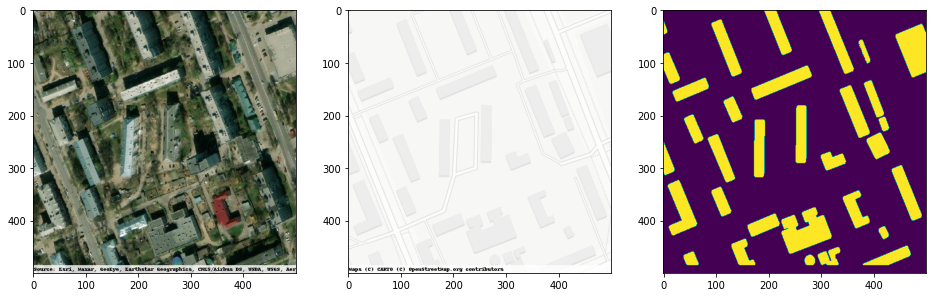

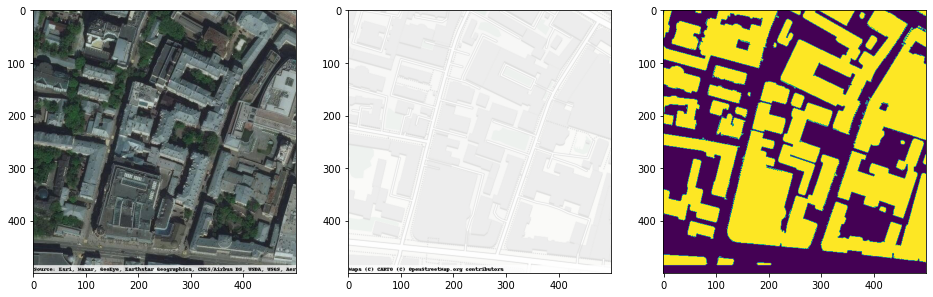

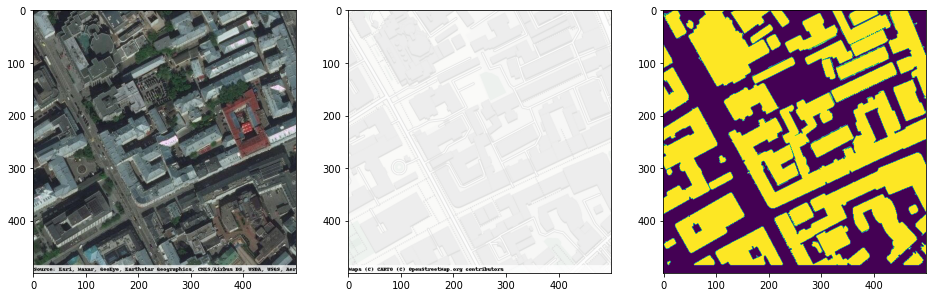

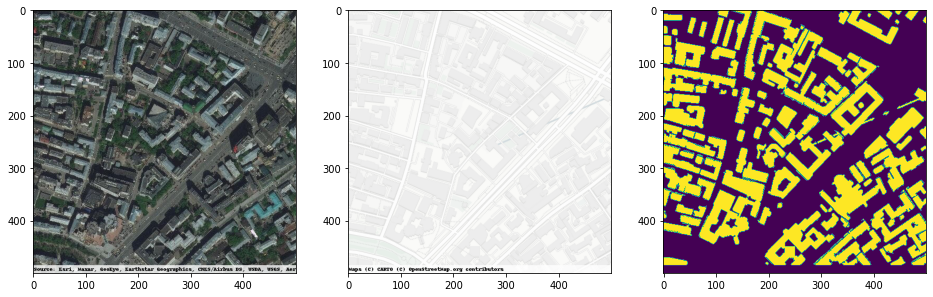

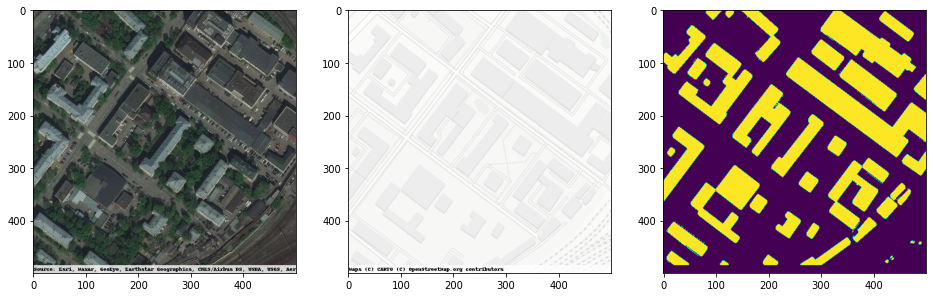

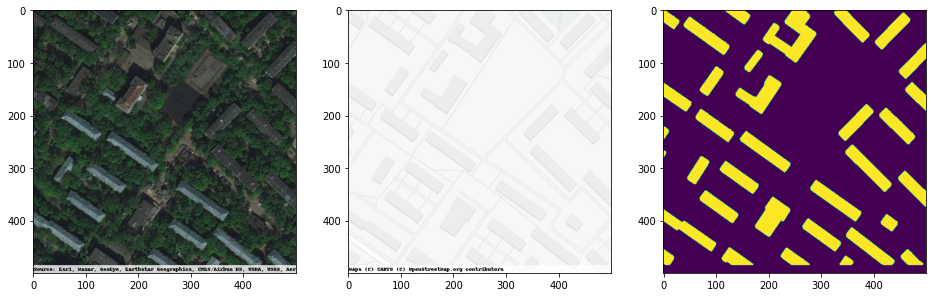

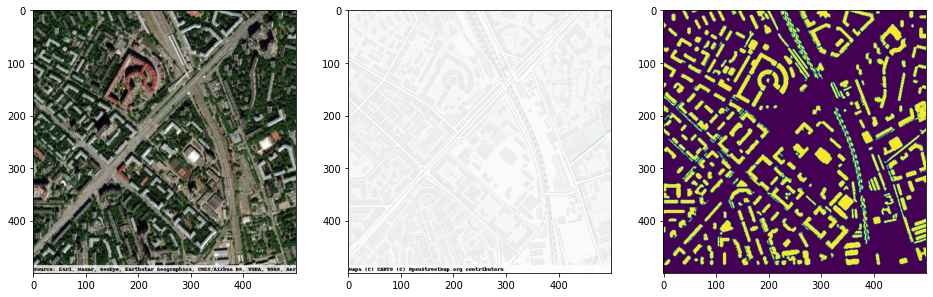

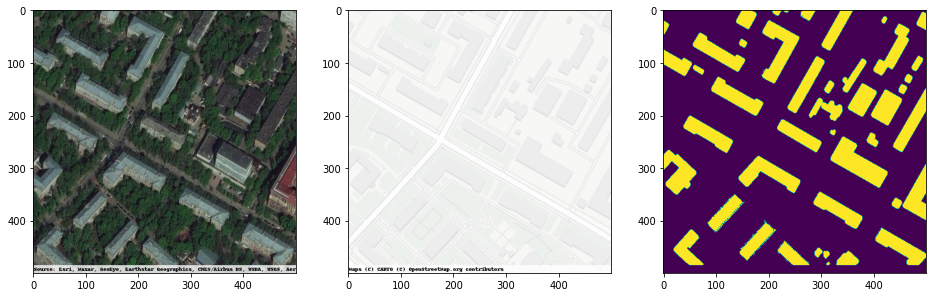

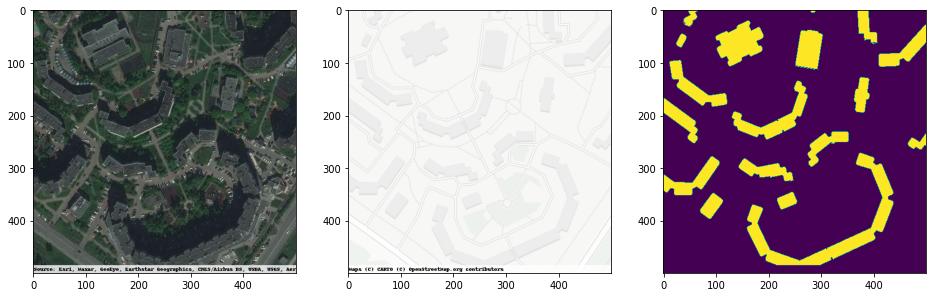

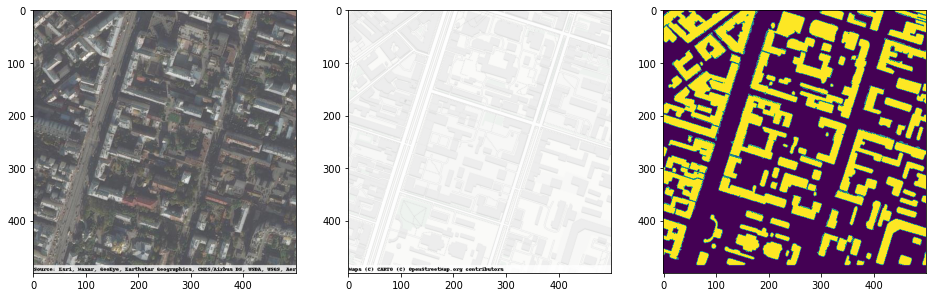

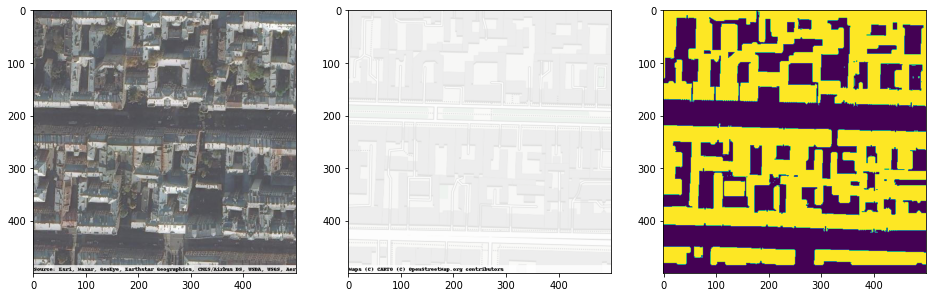

In [231]:
params = """
42.052772|55.578100|17
42.067278|55.545482|18|map not avlp
42.060696|55.567854|16
42.058971|55.566725|17
37.607058|55.754000|17
37.614007|55.763431|17
37.638738|55.768810|16
37.676294|55.782178|17
37.721045|55.808962|17
37.497917|55.794857|15
37.490888|55.797676|17
37.411217|55.767742|16|bad
37.849002|55.682764|17
30.355458|59.918320|16
30.355277|59.944949|17""".split('\n')

size = (500, 500)


for line in params:
    prm = line.split('|')
    if len(prm) != 3:
        continue

    center = staticmaps.create_latlng(float(prm[1]), float(prm[0]))

    cxtCarto.set_center(center)
    cxtCarto.set_zoom(int(prm[2]))

    cxtImagry.set_center(center)
    cxtImagry.set_zoom(int(prm[2]))

    img1 = cxtCarto.render_pillow(size[0], size[1])
    img2 = cxtImagry.render_pillow(size[0], size[1])

    displayPair(img2, img1, processBin(img1))